Standard deviation:
 [83.73240025 14.21240185  6.48942607  2.48279   ]

Proportion of Variance Explained:
 [9.65534221e-01 2.78173366e-02 5.79953492e-03 8.48907879e-04]

Cumulative Proportion:
 [0.96553422 0.99335156 0.99915109 1.        ]


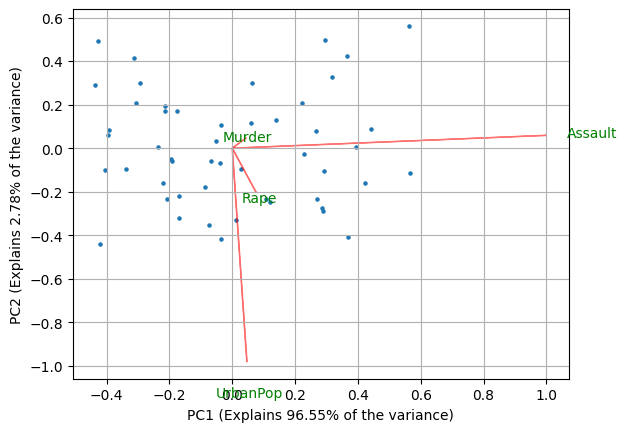

   Features  PC1 Importance  PC2 Importance
1   Assault        0.995221        0.058760
3      Rape        0.075156        0.200718
2  UrbanPop        0.046336        0.976857
0    Murder        0.041704        0.044822


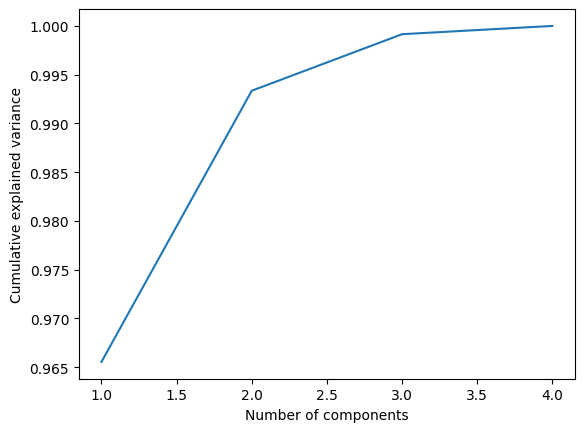

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Load the US Arrests dataset
df = pd.read_csv("UsArrests.csv")

# Motivating Pre-processing Step: 
# The state names are not numerical, therefore, we need to drop the state names column 
df = df.drop(columns=['City'])

# Get the values of the features for PCA analysis
X = df.values.squeeze()

# Perform PCA analysis
pca = PCA()
X_trans = pca.fit_transform(X)

# Generate the PCA Report
df_pca = pd.DataFrame(X_trans)
print("Standard deviation:\n", df_pca.describe().transpose()["std"].values)
print("\nProportion of Variance Explained:\n", pca.explained_variance_ratio_)
print("\nCumulative Proportion:\n", np.cumsum(pca.explained_variance_ratio_))

# Plot the PCA biplot
def biplot(score, coeff, labels=None, points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex, ys * scaley, s=5)

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='green', ha='center', va='center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
 
    plt.xlabel("PC1 (Explains {:.2f}% of the variance)".format(pca.explained_variance_ratio_[0]*100))
    plt.ylabel("PC2 (Explains {:.2f}% of the variance)".format(pca.explained_variance_ratio_[1]*100))
    plt.grid()

labels = list(df.columns)
biplot(X_trans[:,0:2], np.transpose(pca.components_[0:2, :]), labels)
plt.show()

# Feature Importance
pc1 = abs(pca.components_[0])
pc2 = abs(pca.components_[1])

feat_df = pd.DataFrame()
feat_df["Features"] = labels
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df = feat_df.sort_values(by=["PC1 Importance","PC2 Importance"], ascending=False)
print(feat_df)

# Plot the cumulative variance explained by the components
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,5), var_cumu)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()


From the results, it can be observed that the standard deviation of of each principal component (PC) is 83.73, 14.21, 6.48, and 2.48 respectively. The standard deviation measures the spread of the data along each PC. A higher standard deviation indicates that the data is spread out more along that PC.

Proportion of Variance Explained: The first PC explains 96.55% of the total variance in the data, the second PC explains 2.78%, the third PC explains 0.58%, and the fourth PC explains 0.085%.

Cumulative Proportion: The cumulative proportion of explained variance shows that the first two PCs explain 99.34% of the total variance in the data, while all four PCs explain 100% of the variance.

Feature Importance: The feature importances of each PC are shown in the "PC1 Importance" and "PC2 Importance" columns of the dataframe. These values show the contribution of each feature to each PC. The feature with the highest contribution to PC1 is Assault (99.52%), while the feature with the highest contribution to PC2 is UrbanPop (97.69%).

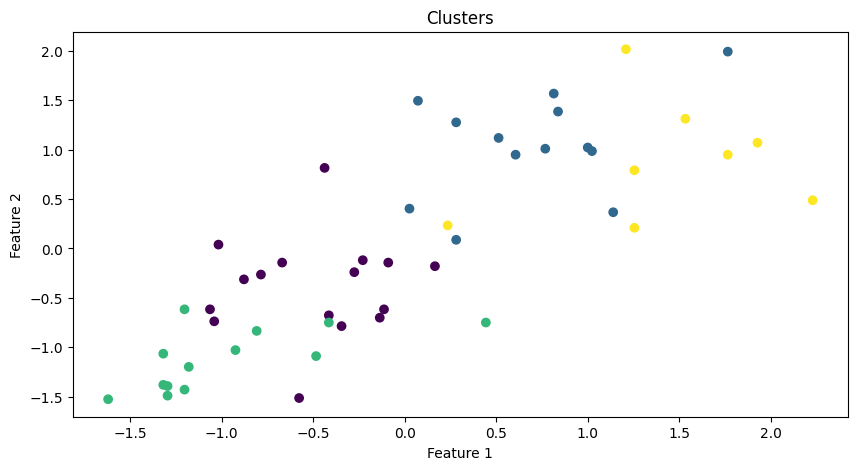

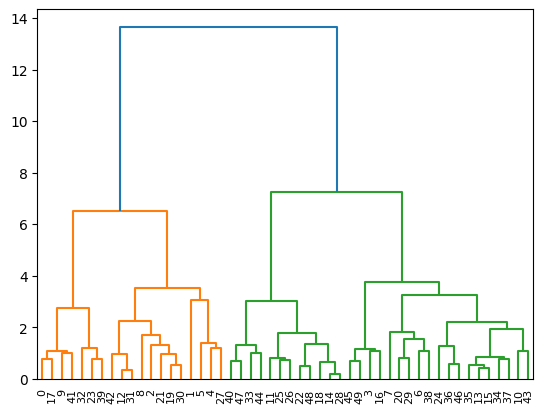

K-means Clustering:
Cluster 0 :
Murder        5.65625
Assault     138.87500
UrbanPop     73.87500
Rape         18.78125
dtype: float64 

Cluster 1 :
Murder       10.815385
Assault     257.384615
UrbanPop     76.000000
Rape         33.192308
dtype: float64 

Cluster 2 :
Murder       3.600000
Assault     78.538462
UrbanPop    52.076923
Rape        12.176923
dtype: float64 

Cluster 3 :
Murder       13.9375
Assault     243.6250
UrbanPop     53.7500
Rape         21.4125
dtype: float64 

Hierarchical Clustering:
Cluster 0 :
Murder       14.671429
Assault     251.285714
UrbanPop     54.285714
Rape         21.685714
dtype: float64 

Cluster 1 :
Murder       10.966667
Assault     264.000000
UrbanPop     76.500000
Rape         33.608333
dtype: float64 

Cluster 2 :
Murder        6.210526
Assault     142.052632
UrbanPop     71.263158
Rape         19.184211
dtype: float64 

Cluster 3 :
Murder       3.091667
Assault     76.000000
UrbanPop    52.083333
Rape        11.833333
dtype: float64 



In [68]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_scaled)
labels = kmeans.labels_

# Extract the cluster labels
cluster_labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 5))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=cluster_labels)
plt.title('Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Hierarchical clustering
mergings = linkage(df_scaled, method="ward")
dendrogram(mergings, labels=df.index)
plt.show()

# Cut the dendrogram into 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1,)

# Analyze commonality within each cluster
print("K-means Clustering:")
for i in range(4):
    print("Cluster", i, ":")
    print(df[labels == i].mean(), "\n")

print("Hierarchical Clustering:")
for i in range(4):
    print("Cluster", i, ":")
    print(df[cluster_labels == i].mean(), "\n")
    

Based on the results from the K-means and Hierarchical Clustering, we can observe the following common characteristics within each cluster:

Cluster 0 in both K-means and Hierarchical Clustering have relatively higher values of murder and assault compared to other clusters.

Cluster 1 in both K-means and Hierarchical Clustering have the highest values of urban population.

Cluster 2 in both K-means and Hierarchical Clustering have the lowest values of murder, assault and rape, while the urban population values are moderate.

Cluster 3 in both K-means and Hierarchical Clustering have moderate values of murder and rape, while the values of assault are higher compared to other clusters.